Iteration 0 Best 19.4840022739 Mean 21.0845055426 Median 21.1507626469 Worst 21.8861844553
Iteration 50 Best 9.24284205332 Mean 11.8816064337 Median 11.8152884085 Worst 13.8043219578
Iteration 100 Best 2.00427122813 Mean 7.65218378704 Median 2.65350975115 Worst 14.2594596647
Iteration 150 Best 1.22018528228 Mean 7.3047430191 Median 5.05347939126 Worst 14.612019928
Iteration 200 Best 0.869094235046 Mean 7.75570071387 Median 6.52906468411 Worst 15.1448941446
Iteration 250 Best 0.869094235046 Mean 6.98113030672 Median 1.98162949332 Worst 14.2614147493
Iteration 300 Best 0.869094235046 Mean 7.1206028372 Median 1.98162949332 Worst 14.1595373741
Iteration 350 Best 0.869094235046 Mean 6.96108413337 Median 4.19490488734 Worst 14.2964397586
Iteration 400 Best 0.869094235046 Mean 5.92884931239 Median 4.19490488734 Worst 13.1063947014
Iteration 450 Best 0.869094235046 Mean 6.92076746964 Median 3.65909970154 Worst 15.2398388651
Iteration 500 Best 0.869094235046 Mean 6.69311210406 Median 5.60238568

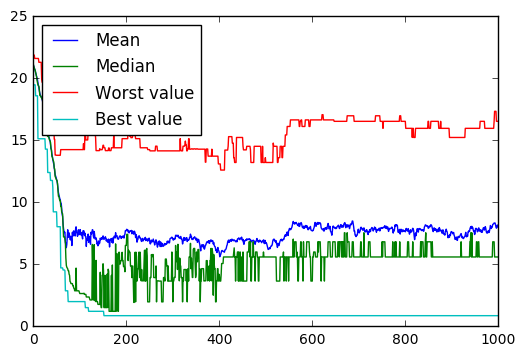

In [5]:
from __future__ import division
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import evolutionary.genetic_algorithms.initializations as initialization
import evolutionary.genetic_algorithms.selections as selection
import evolutionary.genetic_algorithms.mutations as mutation
import evolutionary.genetic_algorithms.crossovers as crossover

import evolutionary.optim_functions as functions
from evolutionary import Population

# Initalize vars
n_dimensions = 10
n_population = 100
n_iterations = 1000
lower = -32
upper = 32

# Log results var
mean = np.array([])
median = np.array([])
worst = np.array([])
best = np.array([])

# Define the fitness function
fitness_function = functions.Ackley().evaluate

# Create the class Population and initialize its chromosomes
population = Population(chromosomes=initialization.uniform(n_population, lower, upper, n_dimensions))


# Iterate simulating the evolutionary process
for i in range(n_iterations):
    # Apply the function in each row to get the array of fitness
    fitness = fitness_function(population.chromosomes)
    
    # Log the values after the iteration  
    mean = np.append(mean, np.mean(fitness))
    median = np.append(median, np.median(fitness))
    worst = np.append(worst, np.max(fitness))
    best = np.append(best, np.min(fitness))
    
    if i%50 == 0:
        print "Iteration", i, "Best", best[i], "Mean", mean[i], "Median", median[i], "Worst", worst[i]
    
    # Do the evolutionary process: selection -> crossover -> mutation -> 
    parents = selection.wheel(population.chromosomes, fitness, N=3, M=1, iterations=20)
    children = crossover.two_point(parents, 1)
    children = mutation.pos_swap(children, 0.8)#, upper, lower, i, n_iterations)
    population.chromosomes = selection.elitist(population.chromosomes, fitness, children,
                                               fitness_function(children), n_population)

if i > 0:
    x = np.arange(0, n_iterations)
    plt.plot(x, mean)
    plt.plot(x, median)
    plt.plot(x, worst,)
    plt.plot(x, best)
    plt.legend(['Mean', 'Median', 'Worst value', 'Best value'], loc='upper left')

    plt.show()

In [ ]:
import evolutionary.genetic_algorithms.selections as selection
import numpy as np
reload(selection)
parents = np.array([[1,2,3,4], [2,3,4,5], [3,2,1,5],[4,5,3,2],[5,3,1,2]])
fitness = np.array([5,3,2,1,6])

selection.wheel(parents,fitness,N=3,M=1,iterations=2)

In [ ]:
import evolutionary.genetic_algorithms.crossovers as crossover
import numpy as np
parents = np.array([[1,2,3,4], [2,3,4,5], [3,2,1,5],[4,5,3,2],[5,3,1,2]])

crossover.one_point_permutation(parents, 1)

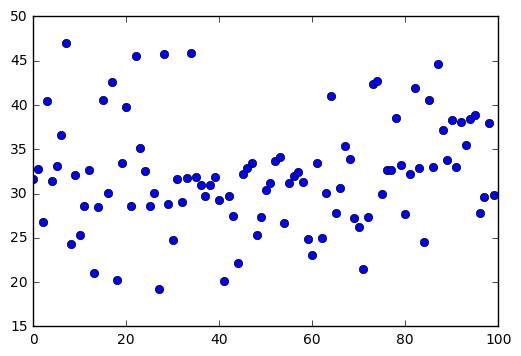

In [9]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

a = np.array([1,3,5,2,3,0])

b=5
t=400
tmax=1000
lower=-32
upper=32

def f(value):
    tao = upper-lower if np.random.uniform(0, 1, 1)>0.5 else lower-upper
    snd_part = (1-np.random.uniform(0, 1)**((1-t/tmax)**b))
    return value + tao * snd_part

x = np.array([])
for i in range(100):
    x = np.append(x, f(32))
    
plt.plot(x, 'o')
    

In [4]:
import numpy as np

a = np.array([1,4,3,2,5,6,0])
b= np.array([[1,2,3,4,5,6,7], [7,6,5,4,3,2,1]])
np.vstack((a,b))

array([[1, 4, 3, 2, 5, 6, 0],
       [1, 2, 3, 4, 5, 6, 7],
       [7, 6, 5, 4, 3, 2, 1]])